# Моделирование эффекта саморепродукции. "Ковёр Талбота"
#### Выполнил: Мулихов Артур Б01-818

### Цели:
#### - посмотреть на интенсивность в зоне $z \leq z_t$
#### - убедиться что оценка на максимальное число плоскостей саморепродукции адекватна
#### - убедиться что вся картина саморепродукции лежит в зоне дифракции френеля



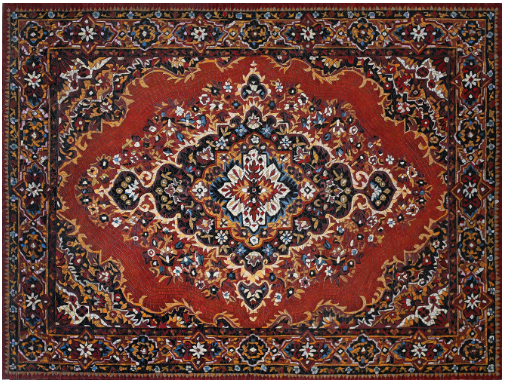

#### документация библиотеки:
* https://pypi.org/project/diffractio/
* https://diffractio.readthedocs.io/en/latest/

In [1]:
#!pip install diffractio
#!pip install hickle

### Подгружаем библиотеки

In [2]:
from diffractio import plt, sp, np, um, mm, degrees, num_max_processors

from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ

from diffractio.utils_multiprocessing import (_pickle_method, _unpickle_method,
                                              execute_multiprocessing)
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.dpi']=500

number of processors: 8


In [3]:
def RunExperiment(x, z, period, wavelength):
    # инициализируем источник 
    u0 = Scalar_source_X(x, wavelength)
    # создаём плоскую волну c максимальной амплитудой А=1
    u0.plane_wave(A=1)

    # инициализируем функцию пропускания транспоранта
    t = Scalar_mask_X(x, wavelength)
    # решетка рончи или наша обычная дифр решетка
    t.ronchi_grating(period=period)

    # инициализируем поля после решётки.
    talbot_effect = Scalar_field_XZ(x, z, wavelength)
    talbot_effect.incident_field(u0*t)
    # метод просчёта поля (beam propogation method https://en.wikipedia.org/wiki/Beam_propagation_method)
    talbot_effect.BPM()
    
    return talbot_effect

### Параметры системы:

In [4]:
wavelength = 0.6238 * um
# период решетки
period = 40 * um
# размер решетки
D = 800 * um

#### Для дифракционной решетки:
$z_d = \frac{D^2}{\lambda}$ -- начиная с $z_d$ -- зона фраунгофера

In [5]:
z_d = D**2/wavelength
print('Z_d:', round(z_d, 2), 'um')

Z_d: 1025969.86 um


$z_t$ -- Длина тальбота

$$
z_t = \frac{2d^2}{\lambda}
$$

In [6]:
z_talbot = 2 * period**2 / wavelength
print('Z_talbot:', round(z_talbot, 2), 'um')

Z_talbot: 5129.85 um


### Нарисуем ковёр

In [7]:
x = np.linspace(-D/2, D/2, 2048)
z = np.linspace(0*um, z_talbot, 2048)

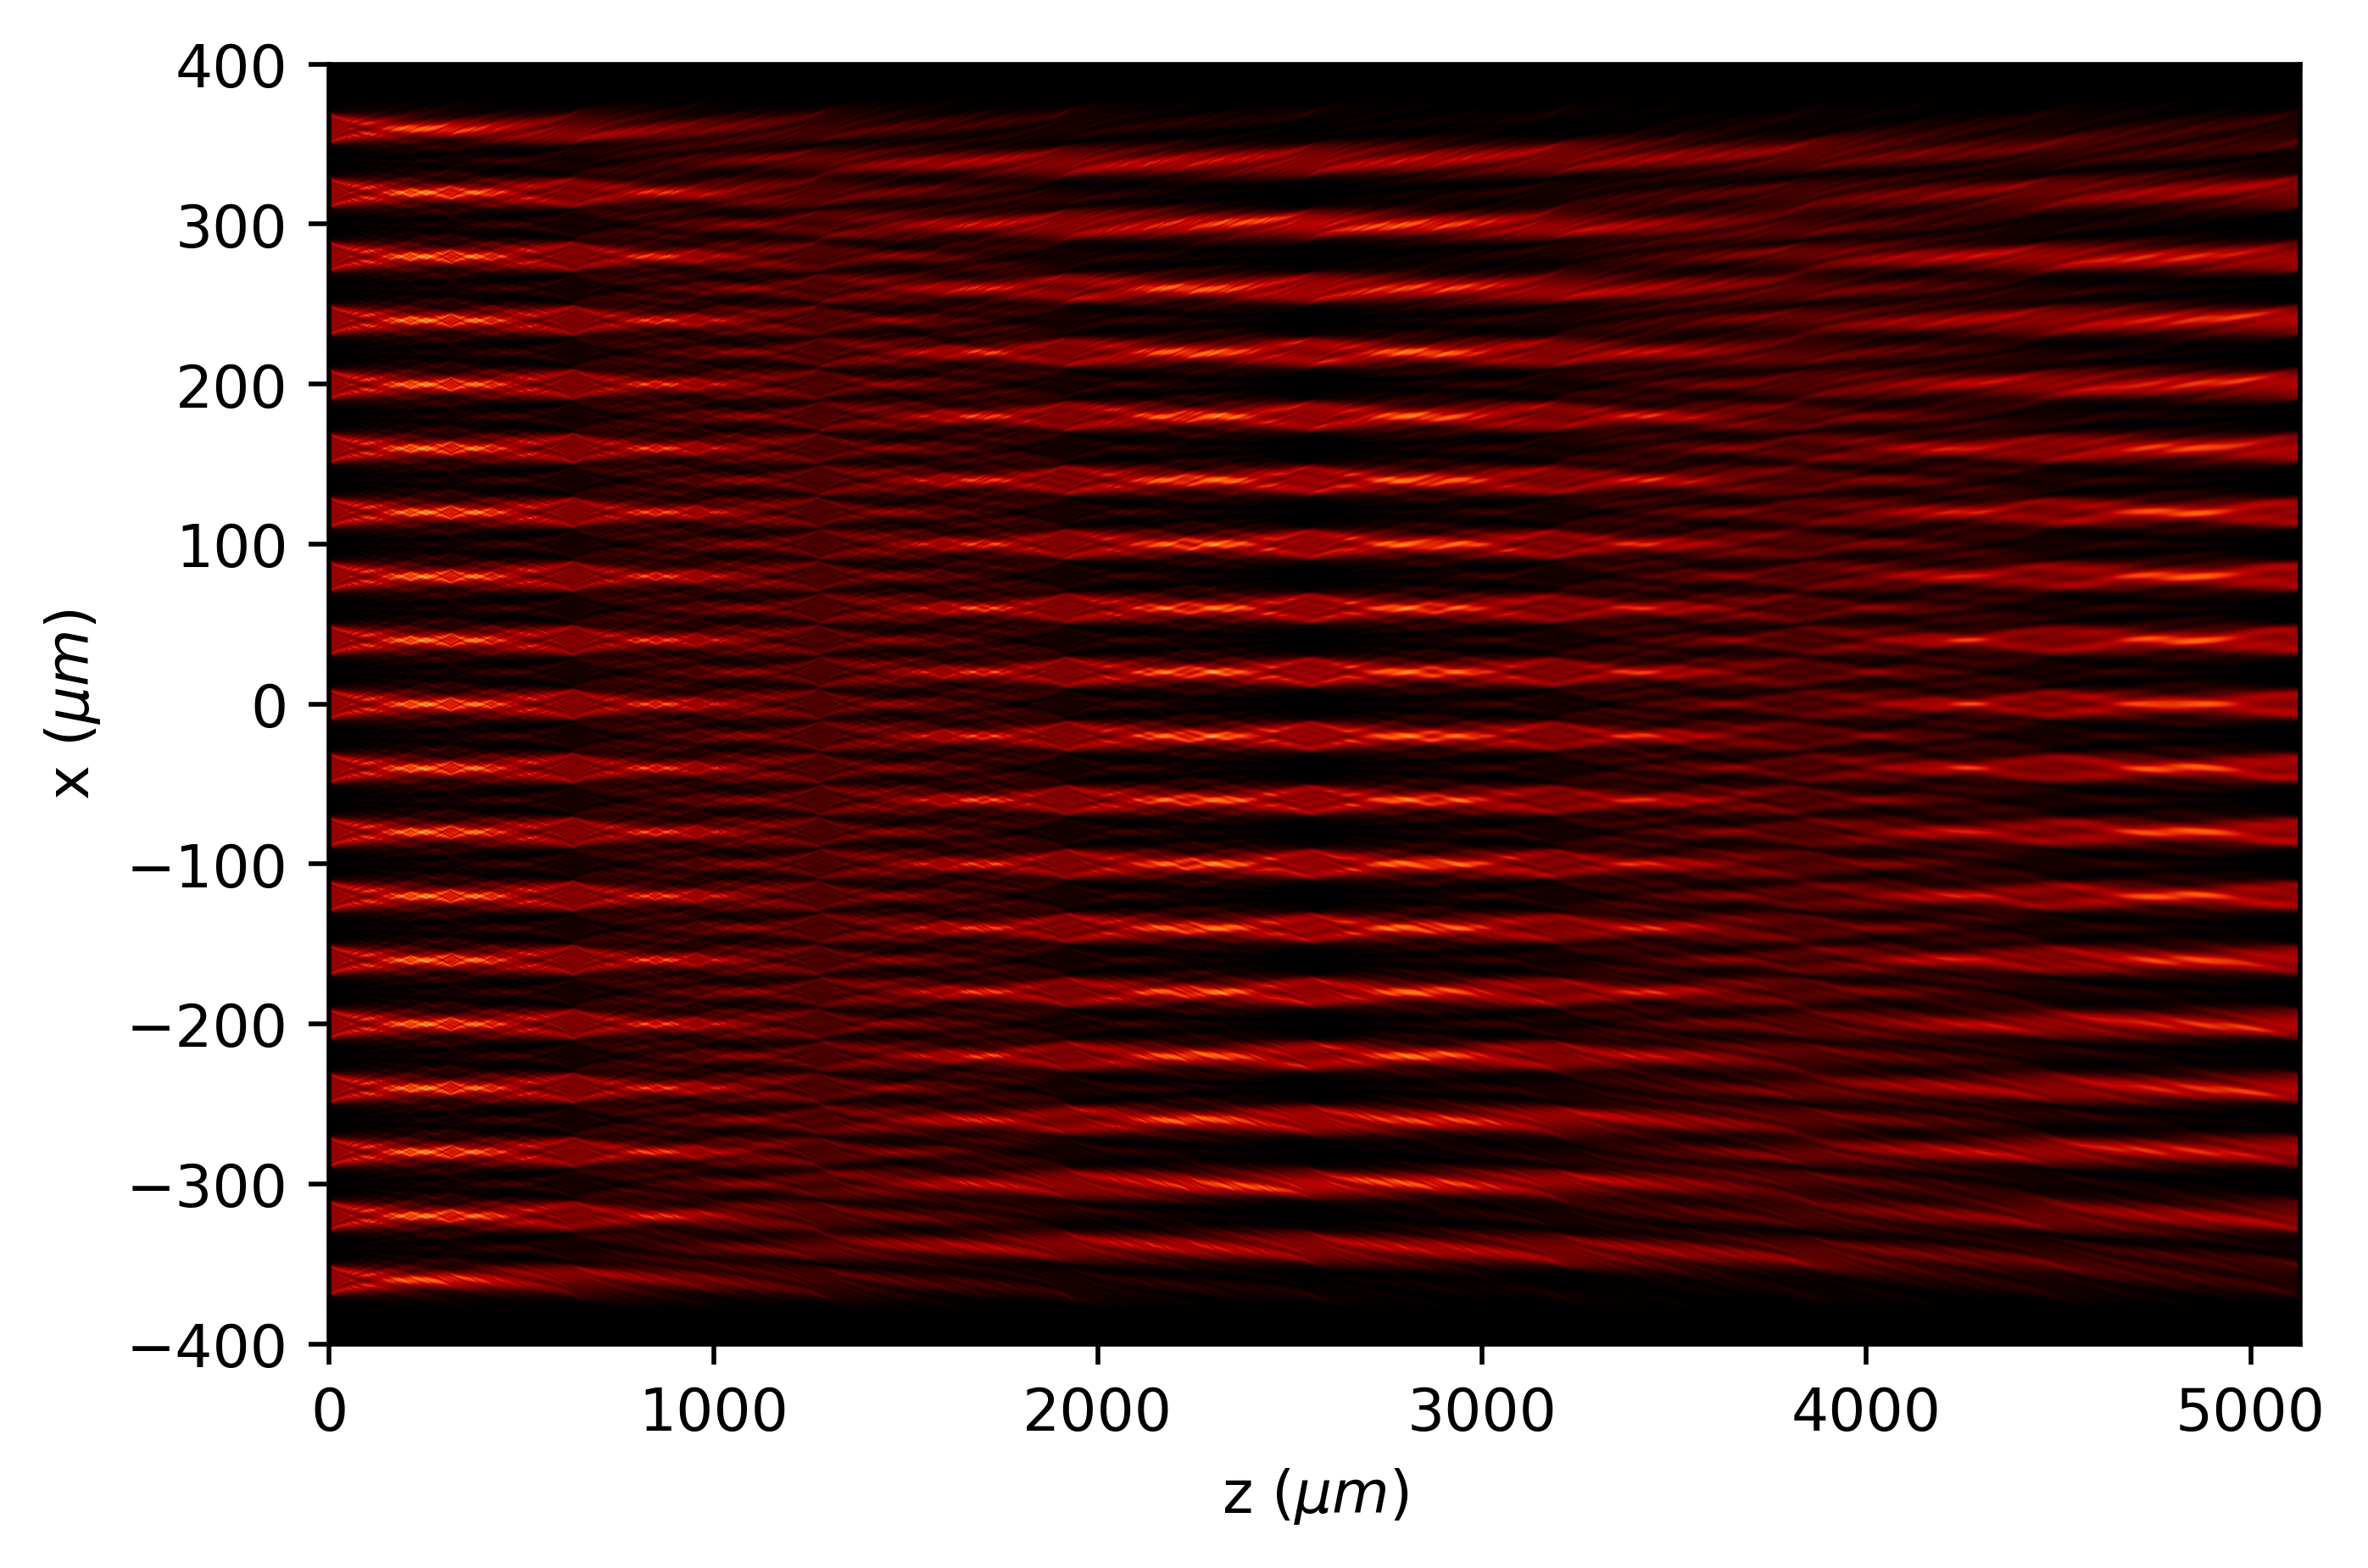

In [8]:
talbot_effect = RunExperiment(x, z, period, wavelength)
talbot_effect.draw(kind='intensity')
plt.show()

### Проверим, что на L

$$
L \approx \frac{D}{2\theta} \approx \frac{Dd}{2\lambda}
$$

саморепродукция исчезает

Число плоскостей саморепродукции: 

$$
N \approx \frac{L}{z_T} = \frac{D}{4d}
$$


In [9]:
x = np.linspace(-D/2, D/2, 2048)
z = np.linspace(0*um, 50*mm, 2048)

In [10]:
L = D * period / (2*wavelength)
N = L / z_talbot

In [11]:
print('На L:', round(L, 2), 'um от решетки саморепродукция исчезает, число плоскостей саморепродукции:', N)

На L: 25649.25 um от решетки саморепродукция исчезает, число плоскостей саморепродукции: 5.0


Видим, что $L < z_d$ , ожидаемо вся картина лежит в зоне френеля

#### Ожидаем увидеть примерно 5 пл-тей саморепродукции

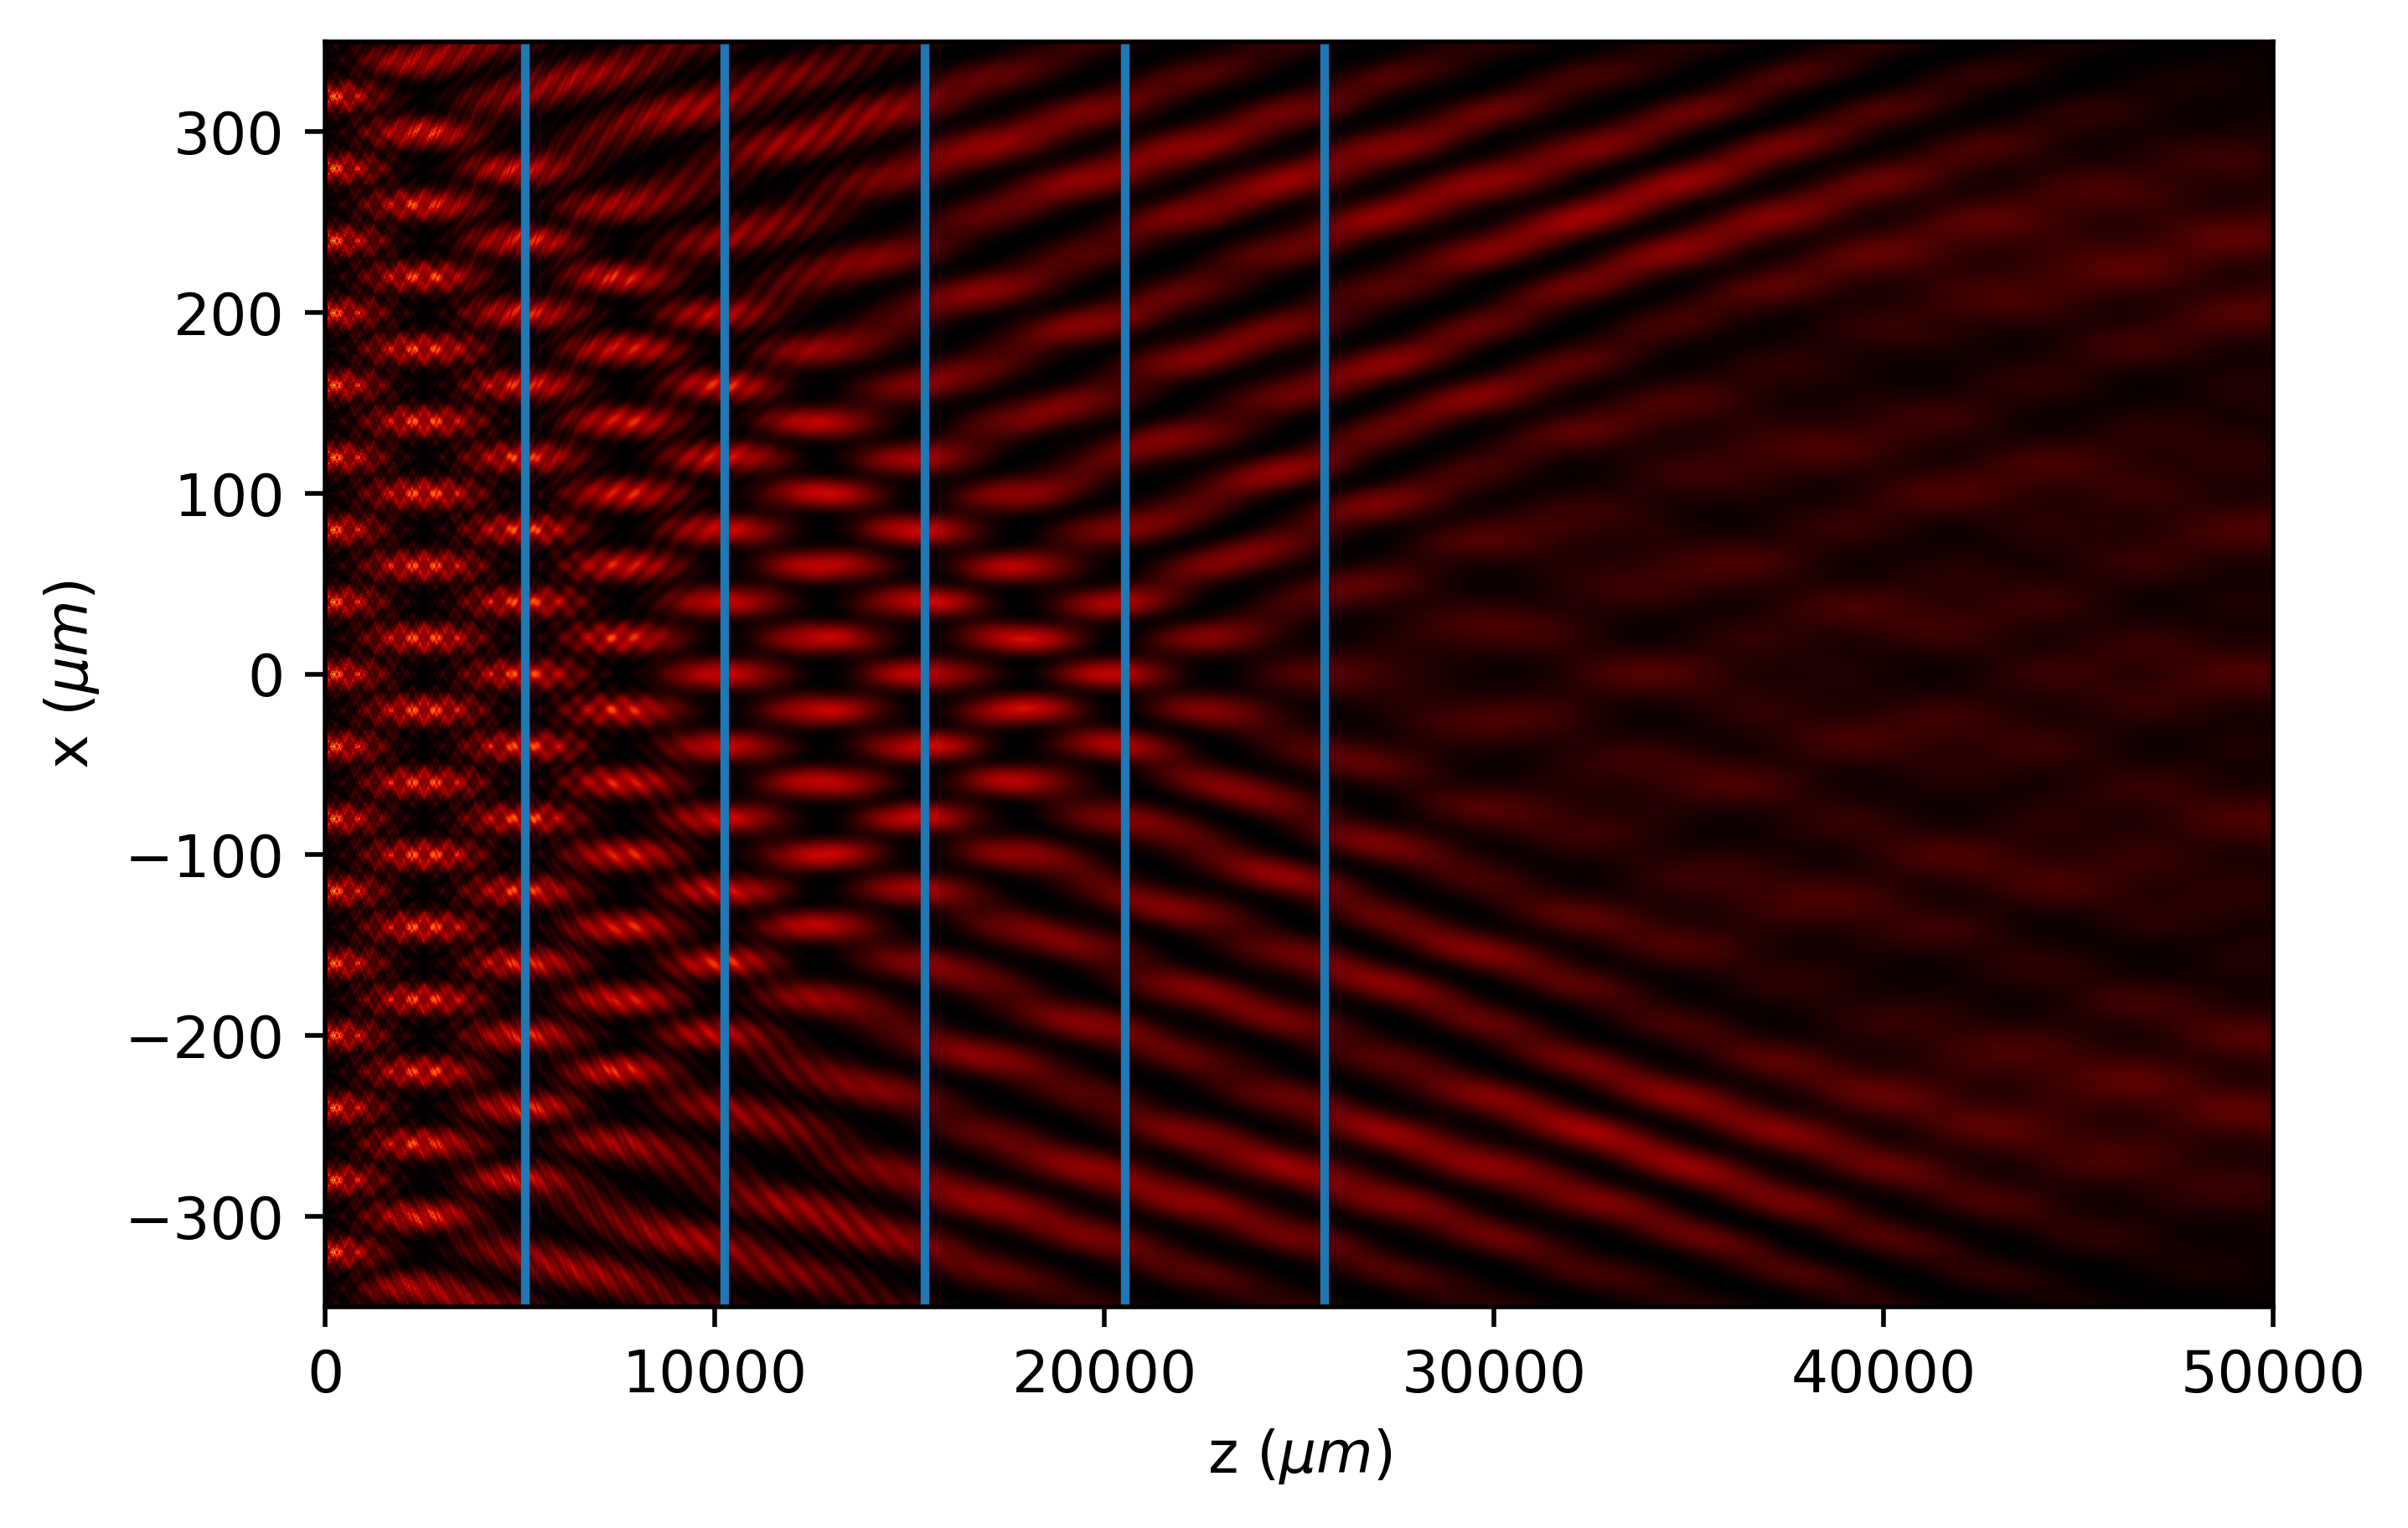

In [12]:
talbot_effect = RunExperiment(x, z, period, wavelength)
talbot_effect.draw(kind='intensity')
plt.ylim(-350*um, 350*um)

for i in range(1, int(N)+1):
    plt.axvline(x = z_talbot * i)
plt.show()